# How frequently have I been running these notebooks?

In [1]:
git_log = !git log

In [11]:
dates = [line[8:] for line in git_log if line.startswith("Date")]

In [19]:
import seaborn as sns
import pandas as pd

In [20]:
dates_ind = pd.to_datetime(dates)

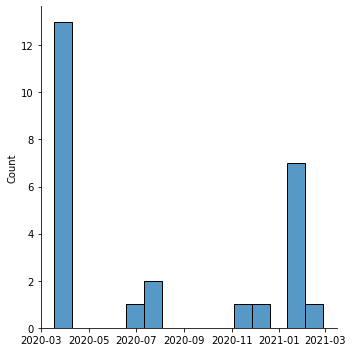

In [25]:
sns.displot(dates_ind, bins=15)